### Shrikant Kale -                301150258

### Lab Assignment 1 - Fashion MNIST and CNN/RNN

a. Import and load the 'fashion_mnist' dataset from TensorFlow. Using 2 dictionaries with keys 'images' and 'labels', store the fashion_mnist datasets into train_firstname and test_firstname, where firstname is your firstname. train_firstname will contain the images and labels of the training data from 'fashion_mnist' and test_firstname will contain the images and labels of the testing data from 'fasion_mnists'. 

In [73]:
#importing libraries
import tensorflow as tf
import numpy as np

#getting the dataset
fashion_mnist = tf.keras.datasets.fashion_mnist

#loading the dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#creating dictionaries for train and test
train_shrikant ={}
test_shrikant = {}

#storing training data into dictionary train_shrikant
train_shrikant['images'] = train_images
train_shrikant['labels'] = train_labels

#storing test_data into dictionary test_shrikant
test_shrikant['images'] = test_images
test_shrikant['labels'] = test_labels


b. Initial Exploration
1. Display (print) the size of the training and testing dataset
2. Display (print) the image resolution (dimension) of the input images.
3. Display (print) the largest pixel value in the dataset using numpy.amax().

In [74]:
#Display size of training dataset
print("Size of training data is {}".format(len(train_shrikant['labels'])))

#Display size of testing dataset
print("Size of testing data is {}".format(len(test_shrikant['labels'])))



Size of training data is 60000
Size of testing data is 10000


In [75]:
#Print dimensions of the input images
print("Dimensions of the input images is {}".format(train_shrikant['images'][0].shape))

Dimensions of the input images is (28, 28)


In [76]:
#Print the largest pixel value in dataset
print("Largest pixel value is {}".format(np.amax(train_shrikant['images'])))

Largest pixel value is 255


Data Pre-preprocessing
1. Normalize the pixel values in the dataset to a range between 0-1 using the info identified in Step b. Store result back into train_firstname['images'] and test_firstname['images']
2. Using tenflow's build in method to_cateogircal() to one-hot encode the labels. Store results back into train_firstname['labels'] and test_firstname['labels']. For more info checkout: https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
3. Display (print) the shape of the train_firstname['labels'] and test_firstname['labels']. Take note of the number of possible labels in the dataset

In [77]:
from keras.utils import to_categorical

#normalizing training and testing dataset
train_shrikant['images'] = train_shrikant['images'] / 255
test_shrikant['images'] = test_shrikant['images'] / 255

#one hot encode the labels
train_shrikant['labels'] = to_categorical(train_shrikant['labels'])
test_shrikant['labels'] = to_categorical(test_shrikant['labels'])

#Print shape of labels train_shrikant and test_shrikant 
print("Shape of training data",train_shrikant['labels'].shape)
print("Shape of testing data",test_shrikant['labels'].shape)

#value_counts for train_shrikant
print("Unique labels", np.unique(train_shrikant['labels']))

Shape of training data (60000, 10)
Shape of testing data (10000, 10)
Unique labels [0. 1.]


d. Visualization
1. Create a function that displays (plots) an image with its true label using matplotlib. Remove xticks and yticks when plotting the image.
2. Using the function created in Step d.1, plot the first 12 data samples in the training dataset using a figure size of 8x8 and a subplot dimension of 4x3

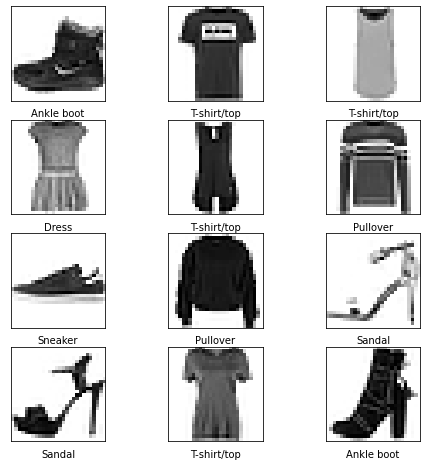

In [78]:
from matplotlib import pyplot

labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

def plot_images(num_of_images):
    pyplot.figure(figsize=(8, 8))
    for i in range(num_of_images):
        pyplot.subplot(4, 3, i+1)
        pyplot.xticks([])
        pyplot.yticks([])
        pyplot.grid(False)
        pyplot.imshow(train_shrikant['images'][i], cmap=pyplot.cm.binary)
        pyplot.xlabel(labels[train_labels[i]])
    pyplot.show()

plot_images(12)

e. Training Data Preparation
1. Using Sklearn's train_test_split() method split the training dataset in 80% training and 20% validation. Set the random seed to be the last two digits of your student ID number. Store the training data in a dataframe named: x_train_firstname for the feature (predictors) and the training labels y_train_firstname. Store the validation data as follows: x_val_firstname and y_val_firstname

In [83]:
from sklearn.model_selection import train_test_split

X_train_shrikant, X_val_shrikant, y_train_shrikant, y_val_shrikant = train_test_split(train_shrikant['images'], train_shrikant['labels'], test_size=0.20, random_state=58)



f. Build, Train, and Validate CNN Model
1. Use TensorFlow's Sequential() to build a CNN mode (name the model cnn_model_firstname) with the following architecture:
i. Input = Set using info identified in Step b.
ii. 1st Layer = Convolution with 32 filter kernels with window size 3x3 and a 'relu' activation function
iii. 2nd Layer = Max Pooling with window size 2x2
iv. 3rd Layer = Convolution with 32 filter kernels with window size 3x3 and a 'relu' activation function
v. 4th Layer = Max Pooling with window size 2x2
vi. 5th Layer = Full connected layer with 100 neurons (Note: Input to fully connected layer should be flatten first)
vii. Output = Set output size using info identified in Step c.3 and a softmax activation function

2. Compile the model with 'adam' optimizer, 'cateogrical_crossentropy' loss function, 'accuracy' metric
3. Display (print) a summary of the model using summary(). Draw a diagram illustrating the structure of the neural network model, making note of the size of each layer (# of neurons) and number of weights in each layer.

In [84]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

cnn_model_shrikant = Sequential()
cnn_model_shrikant.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model_shrikant.add(MaxPooling2D((2, 2)))
cnn_model_shrikant.add(Conv2D(32, (3, 3), activation='relu'))
cnn_model_shrikant.add(MaxPooling2D((2, 2)))
cnn_model_shrikant.add(Flatten())
cnn_model_shrikant.add(Dense(100))
cnn_model_shrikant.add(Dense(10, activation='softmax'))

# compile model
cnn_model_shrikant.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

cnn_model_shrikant.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 800)               0         
                                                                 
 dense_8 (Dense)             (None, 100)              

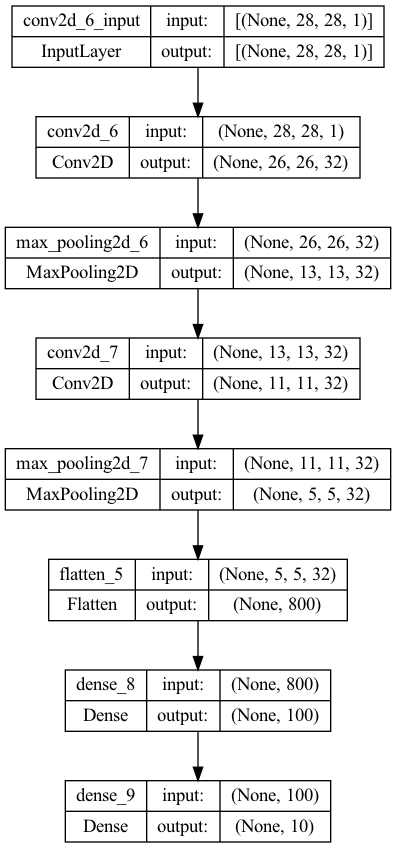

In [85]:
from tensorflow.keras.utils import plot_model

tf.keras.utils.plot_model(cnn_model_shrikant, to_file='model.png', show_shapes=True, show_layer_names=True)
    

4. Using TensorFlow's fit() to train and validate the cnn model with 8 epochs and batch size of 256. Store training/validation results in cnn_history_firstname.

In [86]:
cnn_history_shrikant = cnn_model_shrikant.fit(X_train_shrikant, y_train_shrikant, epochs=8, batch_size=256, validation_data=(X_val_shrikant, y_val_shrikant), verbose=0)

2022-10-09 10:23:02.595903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-09 10:23:11.901417: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


g. Test and analyze the model
1. Display (plot) the Training Vs Validation Accuracy of the CNN Model as a line graph using matplotlib. Provide proper axis labels, title and a legend. Use different line color's for training and validation accuracy. Compare and analyze the training and validation accuracy in your report.

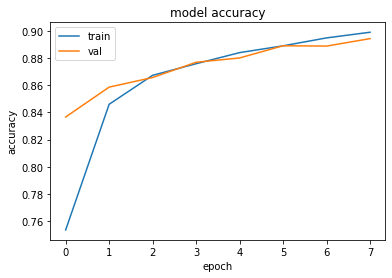

In [87]:
pyplot.plot(cnn_history_shrikant.history['accuracy'])
pyplot.plot(cnn_history_shrikant.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

2. Evaluate the cnn model with the test dataset using Tensorflow's evaluate() and display (Print) the test accuracy.

In [88]:
score_test = cnn_model_shrikant.evaluate(test_shrikant['images'], test_shrikant['labels'])
print("Test Data Accuracy", score_test[1])

score_val = cnn_model_shrikant.evaluate(X_val_shrikant, y_val_shrikant)
print("Validation Data Accuracy", score_val[1])

313/313 [==============================] - 3s 7ms/step - loss: 0.3152 - accuracy: 0.8880
Test Data Accuracy 0.8880000710487366
375/375 [==============================] - 3s 7ms/step - loss: 0.2969 - accuracy: 0.8944
Validation Data Accuracy 0.8944166302680969


3. Create predictions on the test dataset using TensorFlow's predict(). Name in the predictions cnn_predictions_firstname.

In [89]:
cnn_predictions_shrikant = cnn_model_shrikant.predict(test_shrikant['images'])



  1/313 [..............................] - ETA: 1:13

2022-10-09 10:24:17.733797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


4. Create a function that plots the probability distribution of the predictions as a histogram using matplotlib. The function takes in the true label of the image and an array with the probability distribution. Probability of true labels are colored in green and predicted labels are colored in blue. Calling the function should produce a plot similar to below

5. Using the created function in Step d.1 and g.4. display (plot) the first 4 images from the test dataset starting from the last 2 digits of your student number (i.e. if last 2 digits is 23, then display images 24-27) with their prediction probability distribution.

In [91]:
# plot the probability distribution     
def plot_prob_dist(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    pyplot.grid(False)
    pyplot.xticks([])
    pyplot.yticks([])
    thisplot= pyplot.bar(range(10), predictions_array, color="#777777")
    pyplot.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('blue')
    thisplot[true_label].set_color('green')


def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  pyplot.grid(False)
  pyplot.xticks([])
  pyplot.yticks([])
  
  pyplot.imshow(img, cmap=pyplot.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'blue'
  
  pyplot.xlabel("{} {:2.0f}% ({})".format(labels[predicted_label],
                                100*np.max(predictions_array),
                                labels[true_label]),
                                color=color)


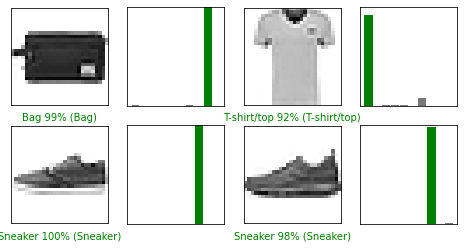

In [107]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
j=0
for i in range(58, 62):
  pyplot.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, cnn_predictions_shrikant, test_labels, test_images)
  pyplot.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_prob_dist(i, cnn_predictions_shrikant, test_labels)
  j=j+1

Example of incorrect prediction

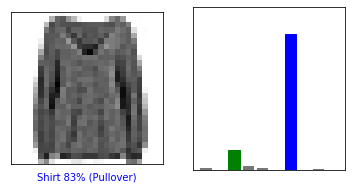

In [103]:
i=49
pyplot.figure(figsize=(6,3))
pyplot.subplot(1,2,1)
plot_image(i, cnn_predictions_shrikant, test_labels, test_images)
pyplot.subplot(1,2,2)
plot_prob_dist(i, cnn_predictions_shrikant, test_labels)

7. Display (plot) the confusion matrix of the test prediction using matplotlib, seaborn, and sklearn's confusion matrix.

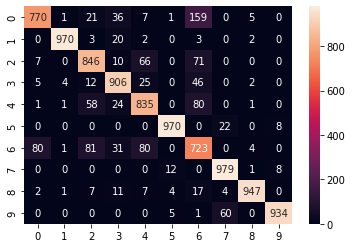

In [108]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cnn_predictions_shrikant = cnn_predictions_shrikant.argmax(axis=1)

cm = confusion_matrix(test_labels, cnn_predictions_shrikant)
f = sns.heatmap(cm, annot=True, fmt='d')

### RNN

h. Build,Train,Validate,Test and Analyze RNN Model
1. Repeat Steps f and g for an RNN model with the following architecture
i. Input = Set using info identified in Step b (Note: you can consider image height as the timestep in the RNN).
ii. 1st Layer = LSTM with hidden state size 128 units
iii. Output = Set output size using info identified in Step c.3 and a softmax activation function

In [ ]:
from keras.layers import LSTM
rnn_model_shrikant = Sequential()
rnn_model_shrikant.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(28, 28)))
rnn_model_shrikant.add(Flatten())
rnn_model_shrikant.add(Dense(10, activation='softmax'))
# compile model
rnn_model_shrikant.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

rnn_model_shrikant.summary()



Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 28, 128)           80384     
                                                                 
 flatten_3 (Flatten)         (None, 3584)              0         
                                                                 
 dense_5 (Dense)             (None, 10)                35850     
                                                                 
Total params: 116,234
Trainable params: 116,234
Non-trainable params: 0
_________________________________________________________________


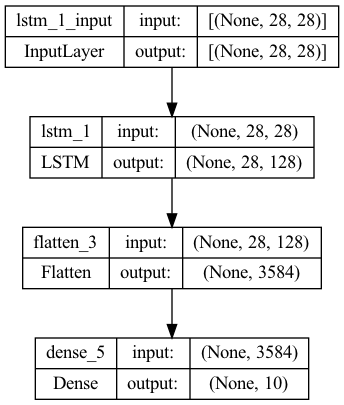

In [ ]:
tf.keras.utils.plot_model(rnn_model_shrikant, to_file='model.png', show_shapes=True, show_layer_names=True)

In [ ]:
rnn_history_shrikant = rnn_model_shrikant.fit(X_train_shrikant, y_train_shrikant, epochs=8, batch_size=256, validation_data=(X_val_shrikant, y_val_shrikant), verbose=0)

2022-10-09 09:54:27.358331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-10-09 09:57:06.629393: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


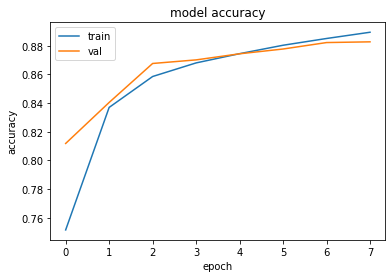

In [110]:
pyplot.plot(rnn_history_shrikant.history['accuracy'])
pyplot.plot(rnn_history_shrikant.history['val_accuracy'])
pyplot.title('model accuracy')
pyplot.ylabel('accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['train', 'val'], loc='upper left')
pyplot.show()

In [109]:
score_test = rnn_model_shrikant.evaluate(test_shrikant['images'], test_shrikant['labels'])
print("Test Data Accuracy", score_test[1])

score_val = rnn_model_shrikant.evaluate(X_val_shrikant, y_val_shrikant)
print("Validation Data Accuracy", score_val[1])

313/313 [==============================] - 17s 54ms/step - loss: 0.3476 - accuracy: 0.8723
Test Data Accuracy 0.8723000288009644
375/375 [==============================] - 20s 54ms/step - loss: 0.3216 - accuracy: 0.8827
Validation Data Accuracy 0.8826666474342346


In [111]:
rnn_predictions_shrikant = rnn_model_shrikant.predict(test_shrikant['images'])


313/313 [==============================] - 16s 50ms/step


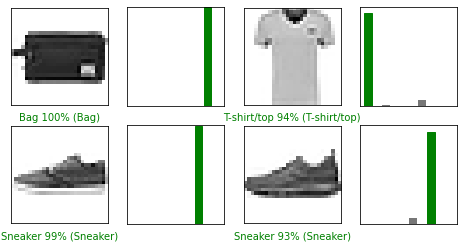

In [112]:
num_rows = 2
num_cols = 2
num_images = num_rows*num_cols
pyplot.figure(figsize=(2*2*num_cols, 2*num_rows))
j=0
for i in range(58, 62):
  pyplot.subplot(num_rows, 2*num_cols, 2*j+1)
  plot_image(i, rnn_predictions_shrikant, test_labels, test_images)
  pyplot.subplot(num_rows, 2*num_cols, 2*j+2)
  plot_prob_dist(i, rnn_predictions_shrikant, test_labels)
  j=j+1

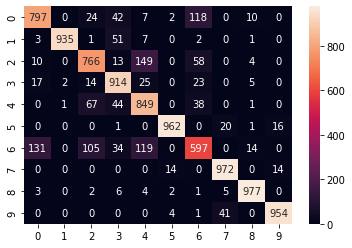

In [113]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
rnn_predictions_shrikant = rnn_predictions_shrikant.argmax(axis=1)
cm = confusion_matrix(test_labels, rnn_predictions_shrikant)
f = sns.heatmap(cm, annot=True, fmt='d')